# Trabajo Final Análisis de Datos
**Alumnos:** Ailin Xala Wilkinson (Natalí Ailín Cantizano); Sergio G. Burdisso;

**¡Imports necesarios!** (⊃｡•́‿•̀｡)⊃..

In [ ]:
%matplotlib inline
from ipywidgets import interact
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-darkgrid')

Trabajaremos con uno de los dataset que vienen incluidos con Seaborn. En particular, usaremos el **dataset "tips"**.

En un restaurante, un mozo recolectó información sobre todos los clientes atendidos durante un intervalo de dos meses y medio a comienzos de 1990.
La información que recolectó fue la siguente:
* **total_bill –** Factura total (en dólares)
* **tip –** Propina (en dolares)
* **sex –** Sexo de la persona pagando la factura (Male, Female)
* **smoker –** Sector fumador? (No, Sí)
* **day –** Jueves, Viernes, Sábado o Domingo (Thur, Fri, Sat, Sun)
* **time –** Almuerzo o Cena (Lunch, Dinner)
* **size –** Número de personas en la mesa

In [2]:
tips = sns.load_dataset('tips')

print("\nVeamos las primeras 10 filas:")

tips.head(10)


Veamos las primeras 10 filas:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


**Antes de comenzar veamos si hay valores nulos.**

In [ ]:
for col in tips.columns:
    print('{:8s}{:4.1f} % datos faltantes'.format(col, tips[col].isnull().mean() * 100))

total_bill 0.0 % datos faltantes
tip      0.0 % datos faltantes
sex      0.0 % datos faltantes
smoker   0.0 % datos faltantes
day      0.0 % datos faltantes
time     0.0 % datos faltantes
size     0.0 % datos faltantes


**¿valores fuera de rango?**

In [4]:
tips.describe().T[["min","max"]].round(2)

,min,max
total_bill,3.07,50.81
tip,1.00,10.00
size,1.00,6.00


Los máximos y mínimos se ven dentro del rango de valores "normales".

Agregaremos una columna extra para tener el porcentaje de propina con respecto al total pagado.

In [5]:
tips['tip(%)'] = pd.Series(tips.tip / tips.total_bill * 100, index=tips.index).round(2)
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


**Veamos algunos números...**

In [6]:
print("\nCantidad de datos disponibles en dataset:", len(tips))

print("Cantidad de datos por cada sexo:")
counts = tips.sex.value_counts()
for col in counts.index:
    print(" >", col, counts[col])


Cantidad de datos disponibles en dataset: 244
Cantidad de datos por cada sexo:
 > Male 157
 > Female 87


Hay más hombres registrados pagando que mujeres.

**¿cuántos datos se grabaron por cada tamaño de grupo?**

In [7]:
print("Cantidad de datos por propinas por tamaño de grupo:")
size_cat = pd.Series(data=tips["size"])
counts = size_cat.value_counts()
for col in counts.index:
    print(" >", col, counts[col])

Cantidad de datos por propinas por tamaño de grupo:
 > 2 156
 > 3 38
 > 4 37
 > 5 5
 > 6 4
 > 1 4


¿serán parejas la mayoría de los clientes? ┐(￣ヘ￣;)┌

**Más números (En relación a los Días y el Tipo de comida)....** (づ ◕‿◕ )づ

In [8]:
pd.crosstab(tips.time, tips.day, margins=True)

day,Thur,Fri,Sat,Sun,All
time,,,,,
Lunch,61,7,0,0,68
Dinner,1,12,87,76,176
All,62,19,87,76,244


Los Sábados y Domingo no se registraron almuerzos y el Jueves se registró una sola cena. La mayoría de los clientes atendidos fueron almuerzos en los Jueves y cenas en los Sábados y Domingos.

**Promedios de porcentajes de propina en relación al sexo y el sector**

In [9]:
pd.pivot_table(tips, "tip(%)", "smoker", "sex", margins=True).round(1)

sex,Male,Female,All
smoker,,,
Yes,15.3,18.2,16.3
No,16.1,15.7,15.9
All,15.8,16.6,16.1


El promedio de porcentaje de propina **total** es mayor para las mujeres(16.6%), las **mujeres** en sector **fumador** dieron las **mayores** propinas(18.2%). De entre los los **no fumadores**, los **hombres** fueron los que mayor propina dejaron(16.1%).

**Ahondemos en esta diferencia con respecto al sexo** 〜(￣▽￣〜)

**¿quién tiene los valores promedio mayores?**

In [10]:
tips.groupby("sex").mean().T.round(2)

sex,Male,Female
total_bill,20.74,18.06
tip,3.09,2.83
size,2.63,2.46
tip(%),15.76,16.65


**Veamos esas diferencias en la propina usando diagramas de barra**

(en dolares)

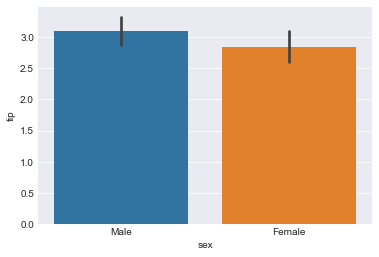

In [11]:
sns.barplot(x="sex", y="tip", data=tips);

**Veamos esas diferencias en la propina usando diagramas de barra**

(porcentaje)

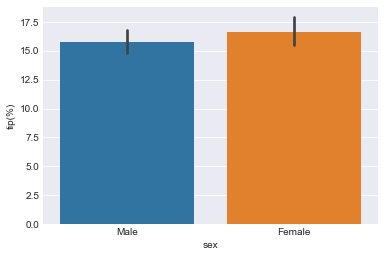

In [12]:
sns.barplot(x="sex", y="tip(%)", data=tips);

**¿cómo varían los valores en relación a los días?**

Veamos nuevamente los valores promedios

In [13]:
tips.groupby("day").mean().T.round(2)

day,Thur,Fri,Sat,Sun
total_bill,17.68,17.15,20.44,21.41
tip,2.77,2.73,2.99,3.26
size,2.45,2.11,2.52,2.84
tip(%),16.13,16.99,15.31,16.69


**¿cómo varía la propina en relación a los días?**

Usando diagramas de barra (en **dolares**)

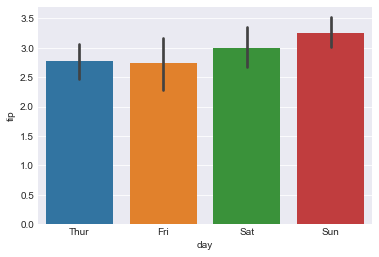

In [14]:
sns.barplot(x="day", y="tip", data=tips);

**¿cómo varía la propina en relación a los días?**

Usando diagramas de barra (usando **porcentajes**)

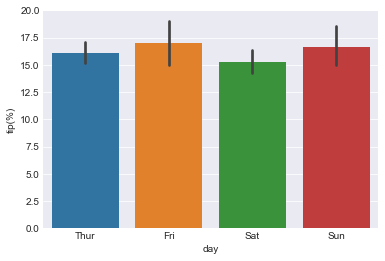

In [15]:
sns.barplot(x="day", y="tip(%)", data=tips);

**¿se mantendrán estos patrones para los hombres y las mujeres?**

(**dolares**)

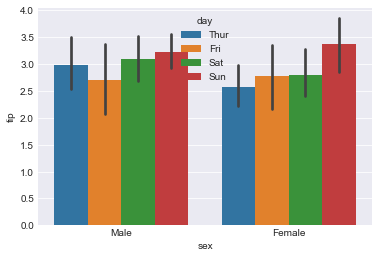

In [16]:
sns.barplot(x="sex", y="tip", hue="day", data=tips);

Mujeres suelen dejar más propina los domingos, y tienen un patrón de aumento de propina conforme avanzan los días. Mientras que los hombres patrón más irregular.

**¿se mantendrán estos patrones para los hombres y las mujeres?**

(**porcentajes**)

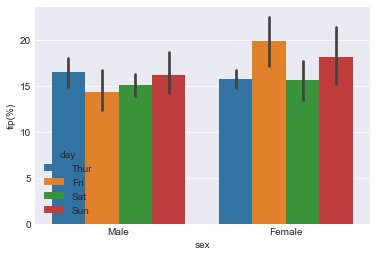

In [17]:
sns.barplot(x="sex", y="tip(%)", hue="day", data=tips);

**¿Hay diferencia entre las propinas dejadas en el almuerzo y las de la cena?**

(**dolares**)

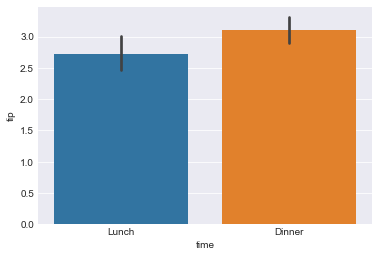

In [18]:
sns.barplot(x="time", y="tip", data=tips);

**¿Hay diferencia entre las propinas dejadas en el almuerzo y las de la cena?**

(**porcentajes**)

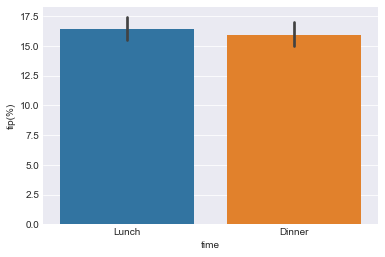

In [19]:
sns.barplot(x="time", y="tip(%)", data=tips);

**¿habrá alguna relación entre el tamaño del grupo y la propina?**

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


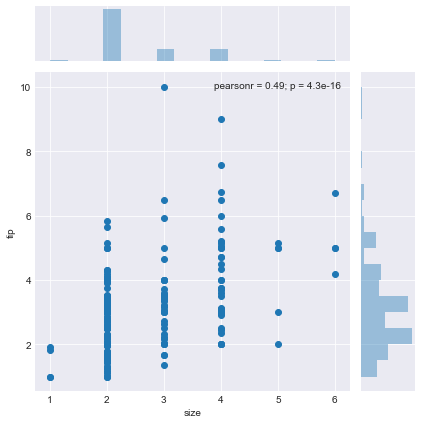

In [20]:
sns.jointplot(x="size", y="tip", kind="scatter", data=tips);
#fg = sns.FacetGrid(tips, hue="sex", size=4, legend_out=False, aspect=2)
#fg.map(plt.scatter, "size", "tip").add_legend();

**¿habrá alguna relación entre el tamaño del grupo y la propina?**

(**hombres**)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


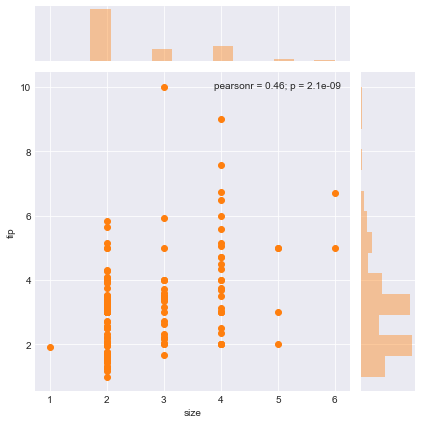

In [21]:
sns.jointplot(x="size", y="tip", kind="scatter", data=tips[tips["sex"]=="Male"], color="C1");

**¿habrá alguna relación entre el tamaño del grupo y la propina?**

(**mujeres**)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


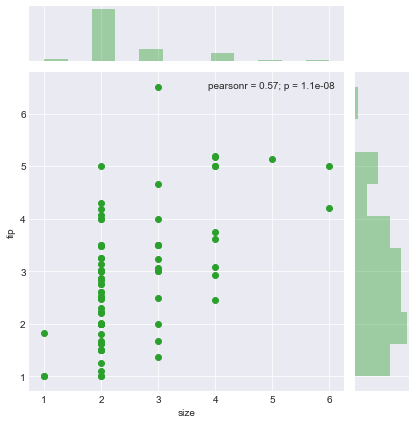

In [22]:
sns.jointplot(x="size", y="tip", kind="scatter", data=tips[tips["sex"]=="Female"], color="C2");

Las mujeres tienen un coeficiente de correlación de Pearson mayor (0.57) que el de los hombres (0.46).

**¿y entre el total pagado y la propina?**

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


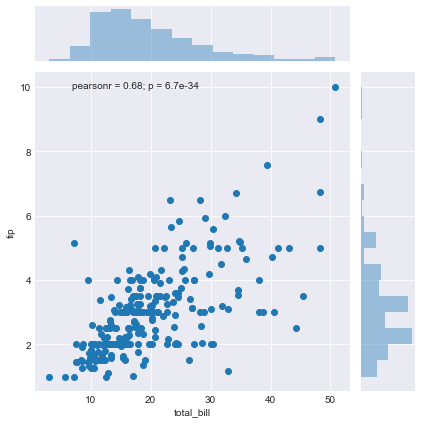

In [23]:
sns.jointplot(x="total_bill", y="tip", kind="scatter", data=tips);
#fg = sns.FacetGrid(tips, hue="sex", size=4, legend_out=False, aspect=2)
#fg.map(plt.scatter, "total_bill", "tip").add_legend();

**¿y entre el total pagado y la propina?**

(**hombres**)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


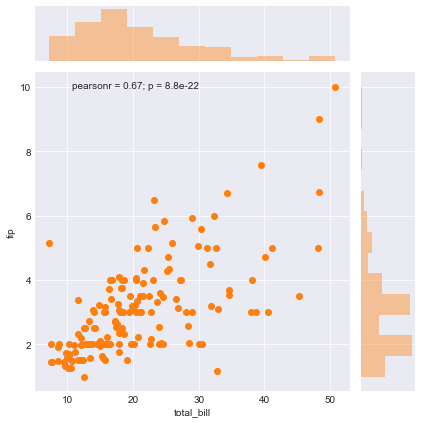

In [24]:
sns.jointplot(x="total_bill", y="tip", kind="scatter", data=tips[tips["sex"]=="Male"], color="C1");

**¿y entre el total pagado y la propina?**

(**mujeres**)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


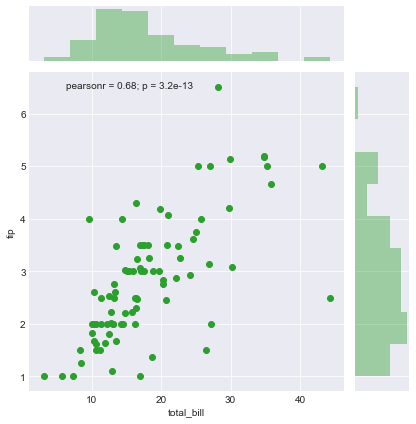

In [25]:
sns.jointplot(x="total_bill", y="tip", kind="scatter", data=tips[tips["sex"]=="Female"], color="C2");

En este caso prácticamente no hay una diferencia entre los hombres(0.67) y las muejeres(0.68).

** Finalmente, hagamos usemos el PairGrid de seabron para ver la relación entre los atributos y los días de la semana.**

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


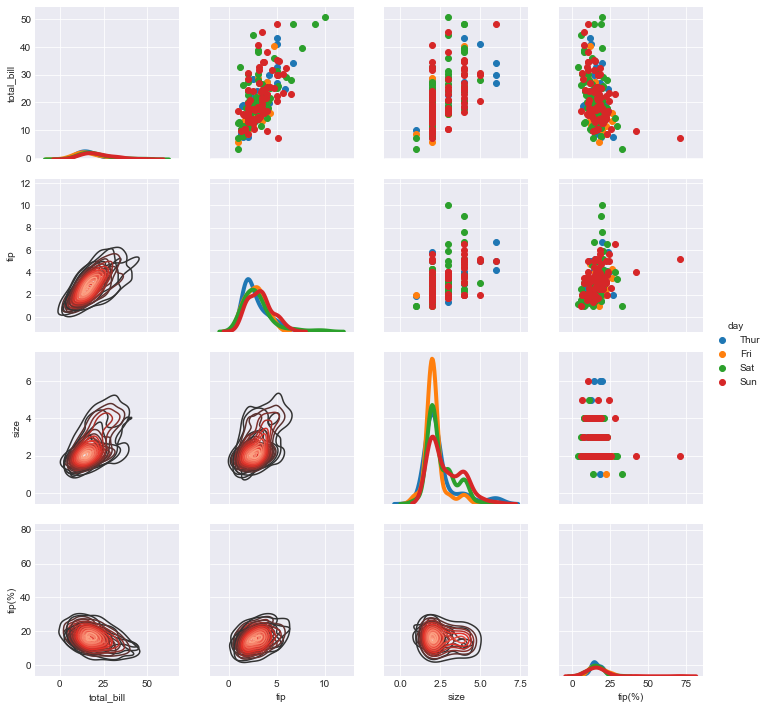

In [26]:
pg = sns.PairGrid(tips, hue="day");pg.map_upper(plt.scatter);pg.map_lower(sns.kdeplot, cmap="Reds_d");pg.map_diag(sns.kdeplot, lw=4);pg.add_legend();

# ¡EL FIN!

### Gracias por su atención ／(￣▽￣)／